# Survival Analysis Using Lifelines

In [12]:
import pandas as pd
from lifelines.datasets import load_dd
from lifelines.datasets import load_rossi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Kanplan-Merier Estimator

In [3]:
data = load_dd()

A glance at the data

In [4]:
data.sample(10)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
555,France,220,220.0,Western Europe,Europe,Georges Pompidou,Georges Pompidou.France.1965.1967.Mixed Dem,Democracy,Mixed Dem,1965,3,1
21,Algeria,615,615.0,Northern Africa,Africa,military,military.Algeria.1978.1978.Military Dict,Non-democracy,Military Dict,1978,1,1
721,Iceland,395,395.0,Northern Europe,Europe,Olafur Johannesson,Olafur Johannesson.Iceland.1971.1973.Mixed Dem,Democracy,Mixed Dem,1971,3,1
805,Italy,325,325.0,Southern Europe,Europe,Emilio Colombo,Emilio Colombo.Italy.1970.1971.Parliamentary Dem,Democracy,Parliamentary Dem,1970,2,1
1255,Peru,135,135.0,South America,Americas,Fernando Belaunde Terry,Fernando Belaunde Terry.Peru.1980.1984.Preside...,Democracy,Presidential Dem,1980,5,1
1484,Sudan,625,625.0,Northern Africa,Africa,Sadiq al-Mahdi,Sadiq al-Mahdi.Sudan.1966.1966.Parliamentary Dem,Democracy,Parliamentary Dem,1966,1,1
1095,Nauru,970,970.0,Micronesia,Oceania,Bernard Dowiyoyo,Bernard Dowiyoyo.Nauru.1998.1998.Parliamentary...,Democracy,Parliamentary Dem,1998,1,1
796,Italy,325,325.0,Southern Europe,Europe,Giuseppe Pella,Giuseppe Pella.Italy.1953.1953.Parliamentary Dem,Democracy,Parliamentary Dem,1953,1,1
1331,San Marino,331,331.0,Southern Europe,Europe,Pier Natalino Mularoni + Marino Venturini,Pier Natalino Mularoni + Marino Venturini.San ...,Democracy,Parliamentary Dem,1995,1,1
1514,Switzerland,225,225.0,Western Europe,Europe,Enrico Celio,Enrico Celio.Switzerland.1948.1948.Presidentia...,Democracy,Presidential Dem,1948,1,1


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [7]:
# time and events
T = data['duration']
E = data['observed']
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

Text(0.5,1,'Survival function of political regimes')

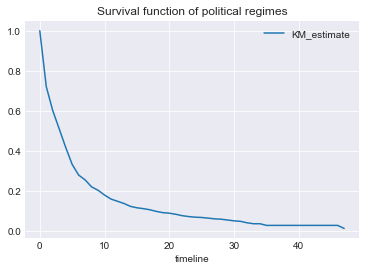

In [13]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes')

In [16]:
kmf.plot?

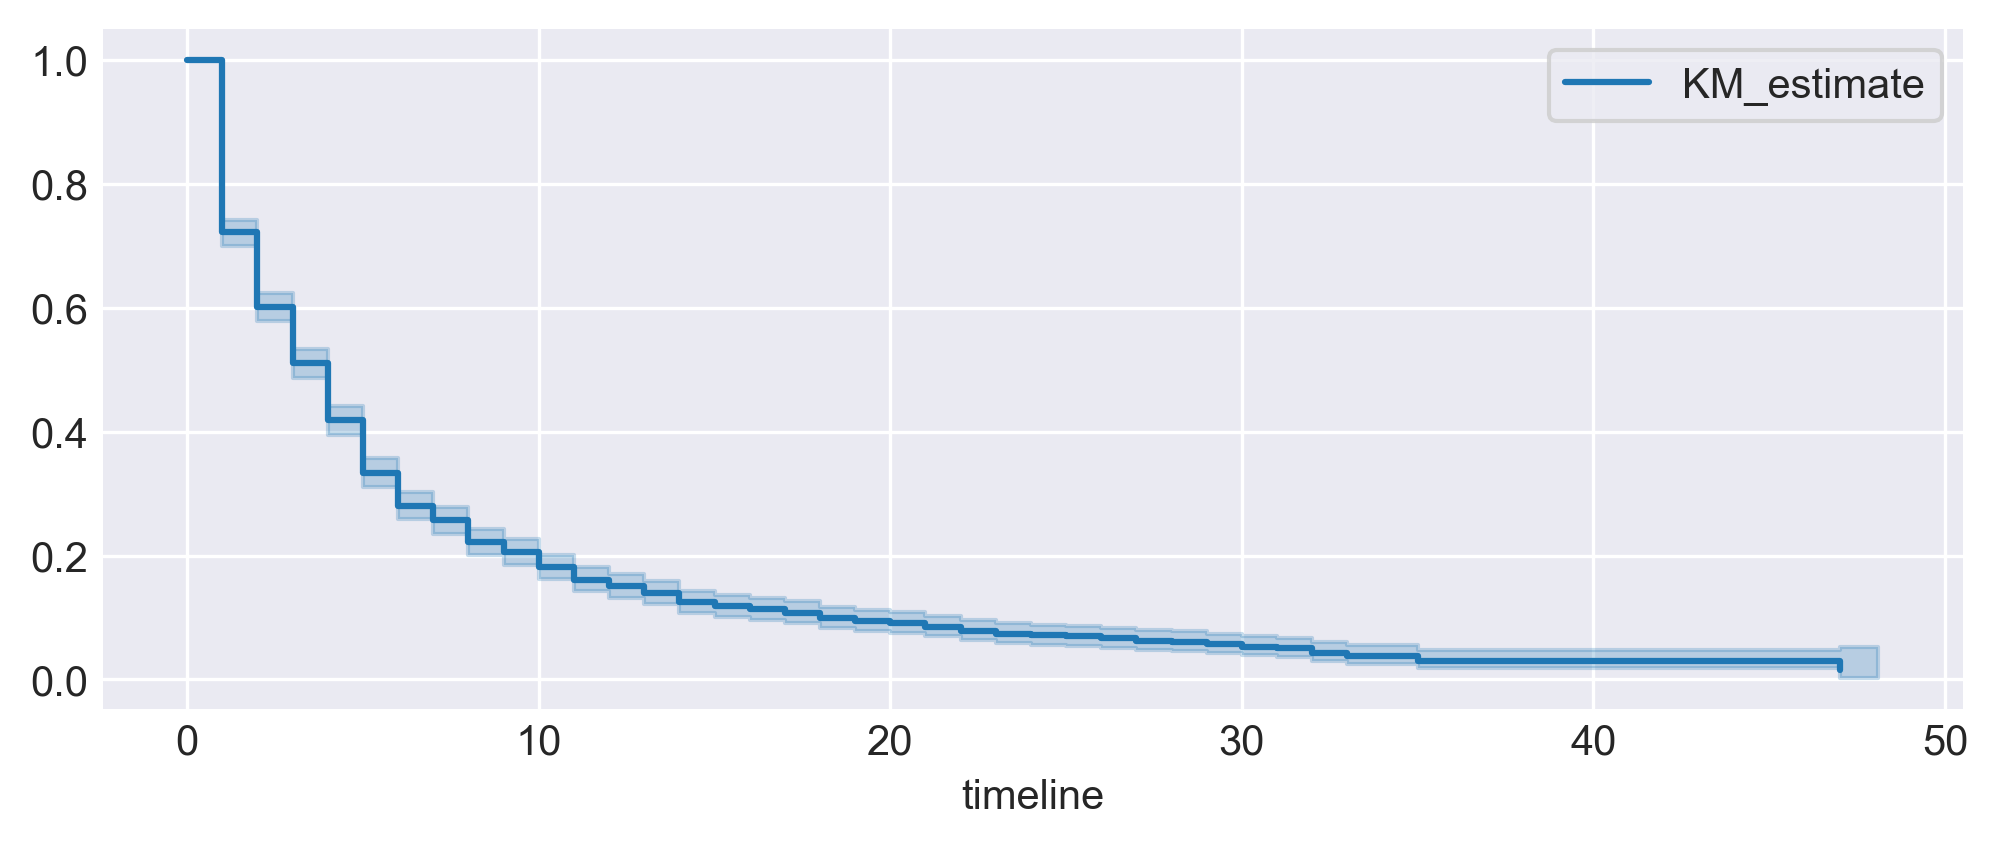

In [19]:
fig = plt.figure(figsize = (8, 3), dpi = 300)
kmf.plot(ax = plt.gca())
plt.legend(frameon = True)

Median

In [20]:
kmf.median_

4.0

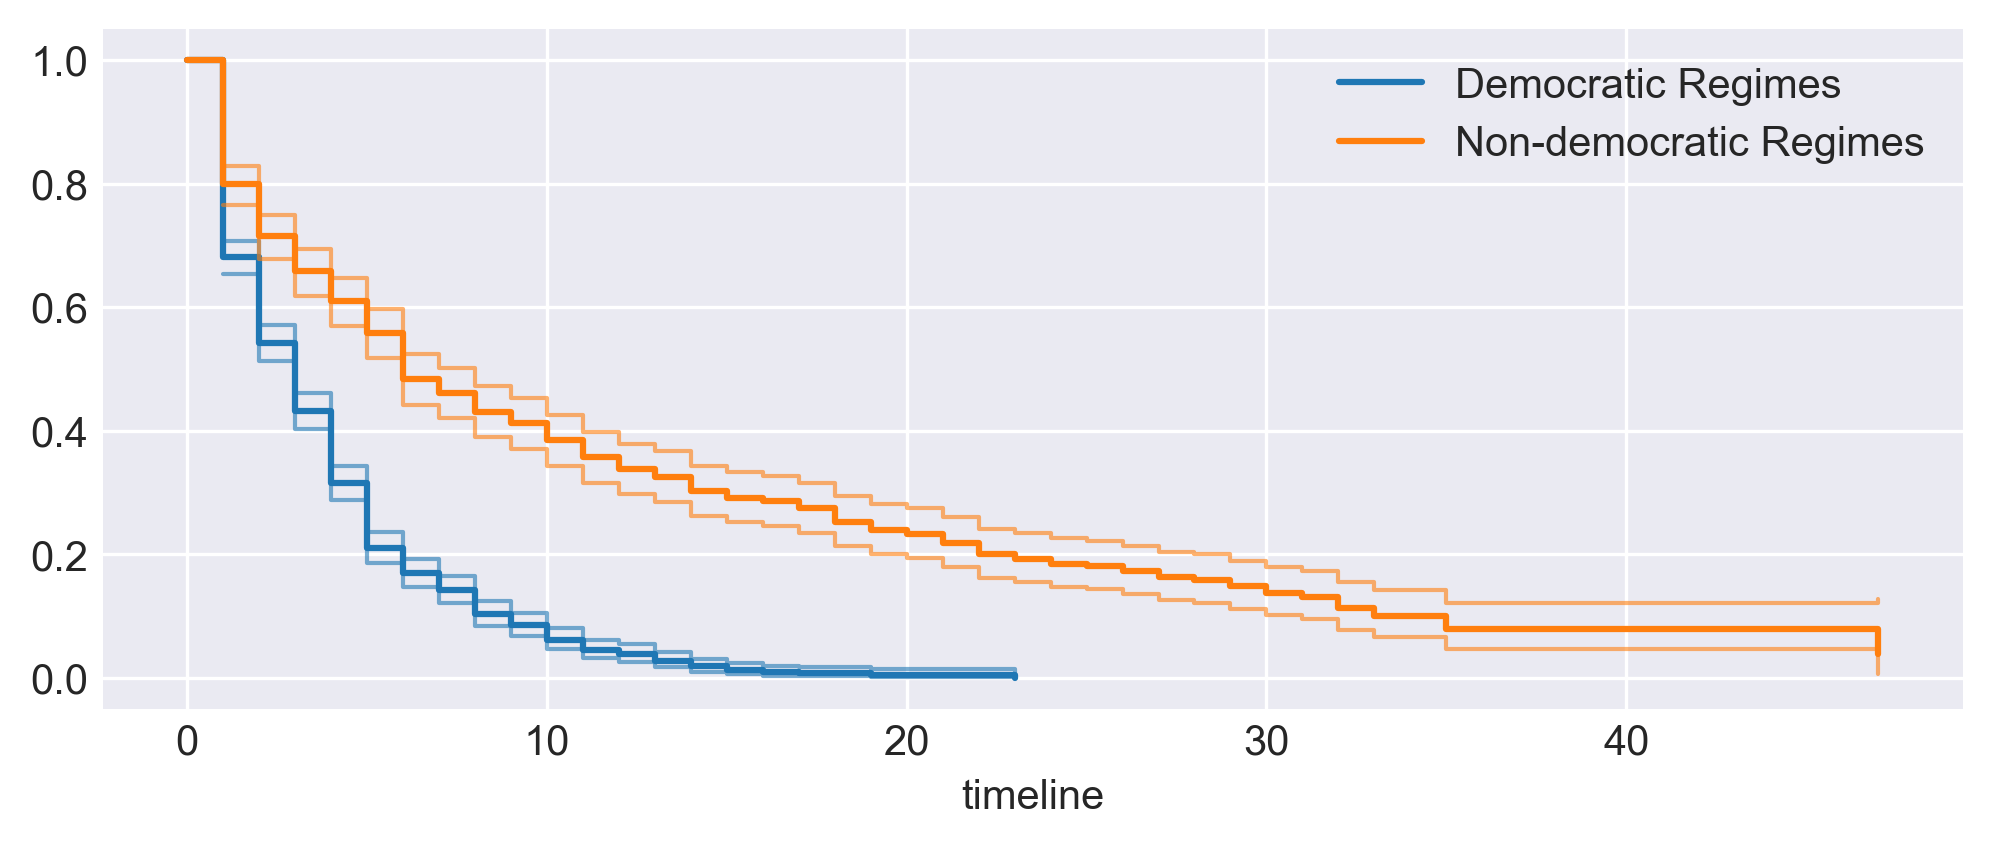

In [28]:
fig = plt.figure(figsize = (8, 3), dpi = 300)
ax = plt.gca()
dem = (data['democracy'] == 'Democracy')
kmf.fit(T[dem], event_observed = E[dem], label = 'Democratic Regimes')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~dem], event_observed = E[~dem], label = 'Non-democratic Regimes')
kmf.plot(ax = ax, ci_force_lines = True)
# plt.legend(frameon = True)

## Log-rank test
Logrank is a common statistical test in survival analysis that compares two event series’ generators. If the value returned exceeds some pre-specified value, then we rule that the series have different generators.

In [30]:
from lifelines.statistics import logrank_test

In [31]:
results = logrank_test(T[dem], T[~dem], E[dem], E[~dem], alpha = 0.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
      260.4695 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


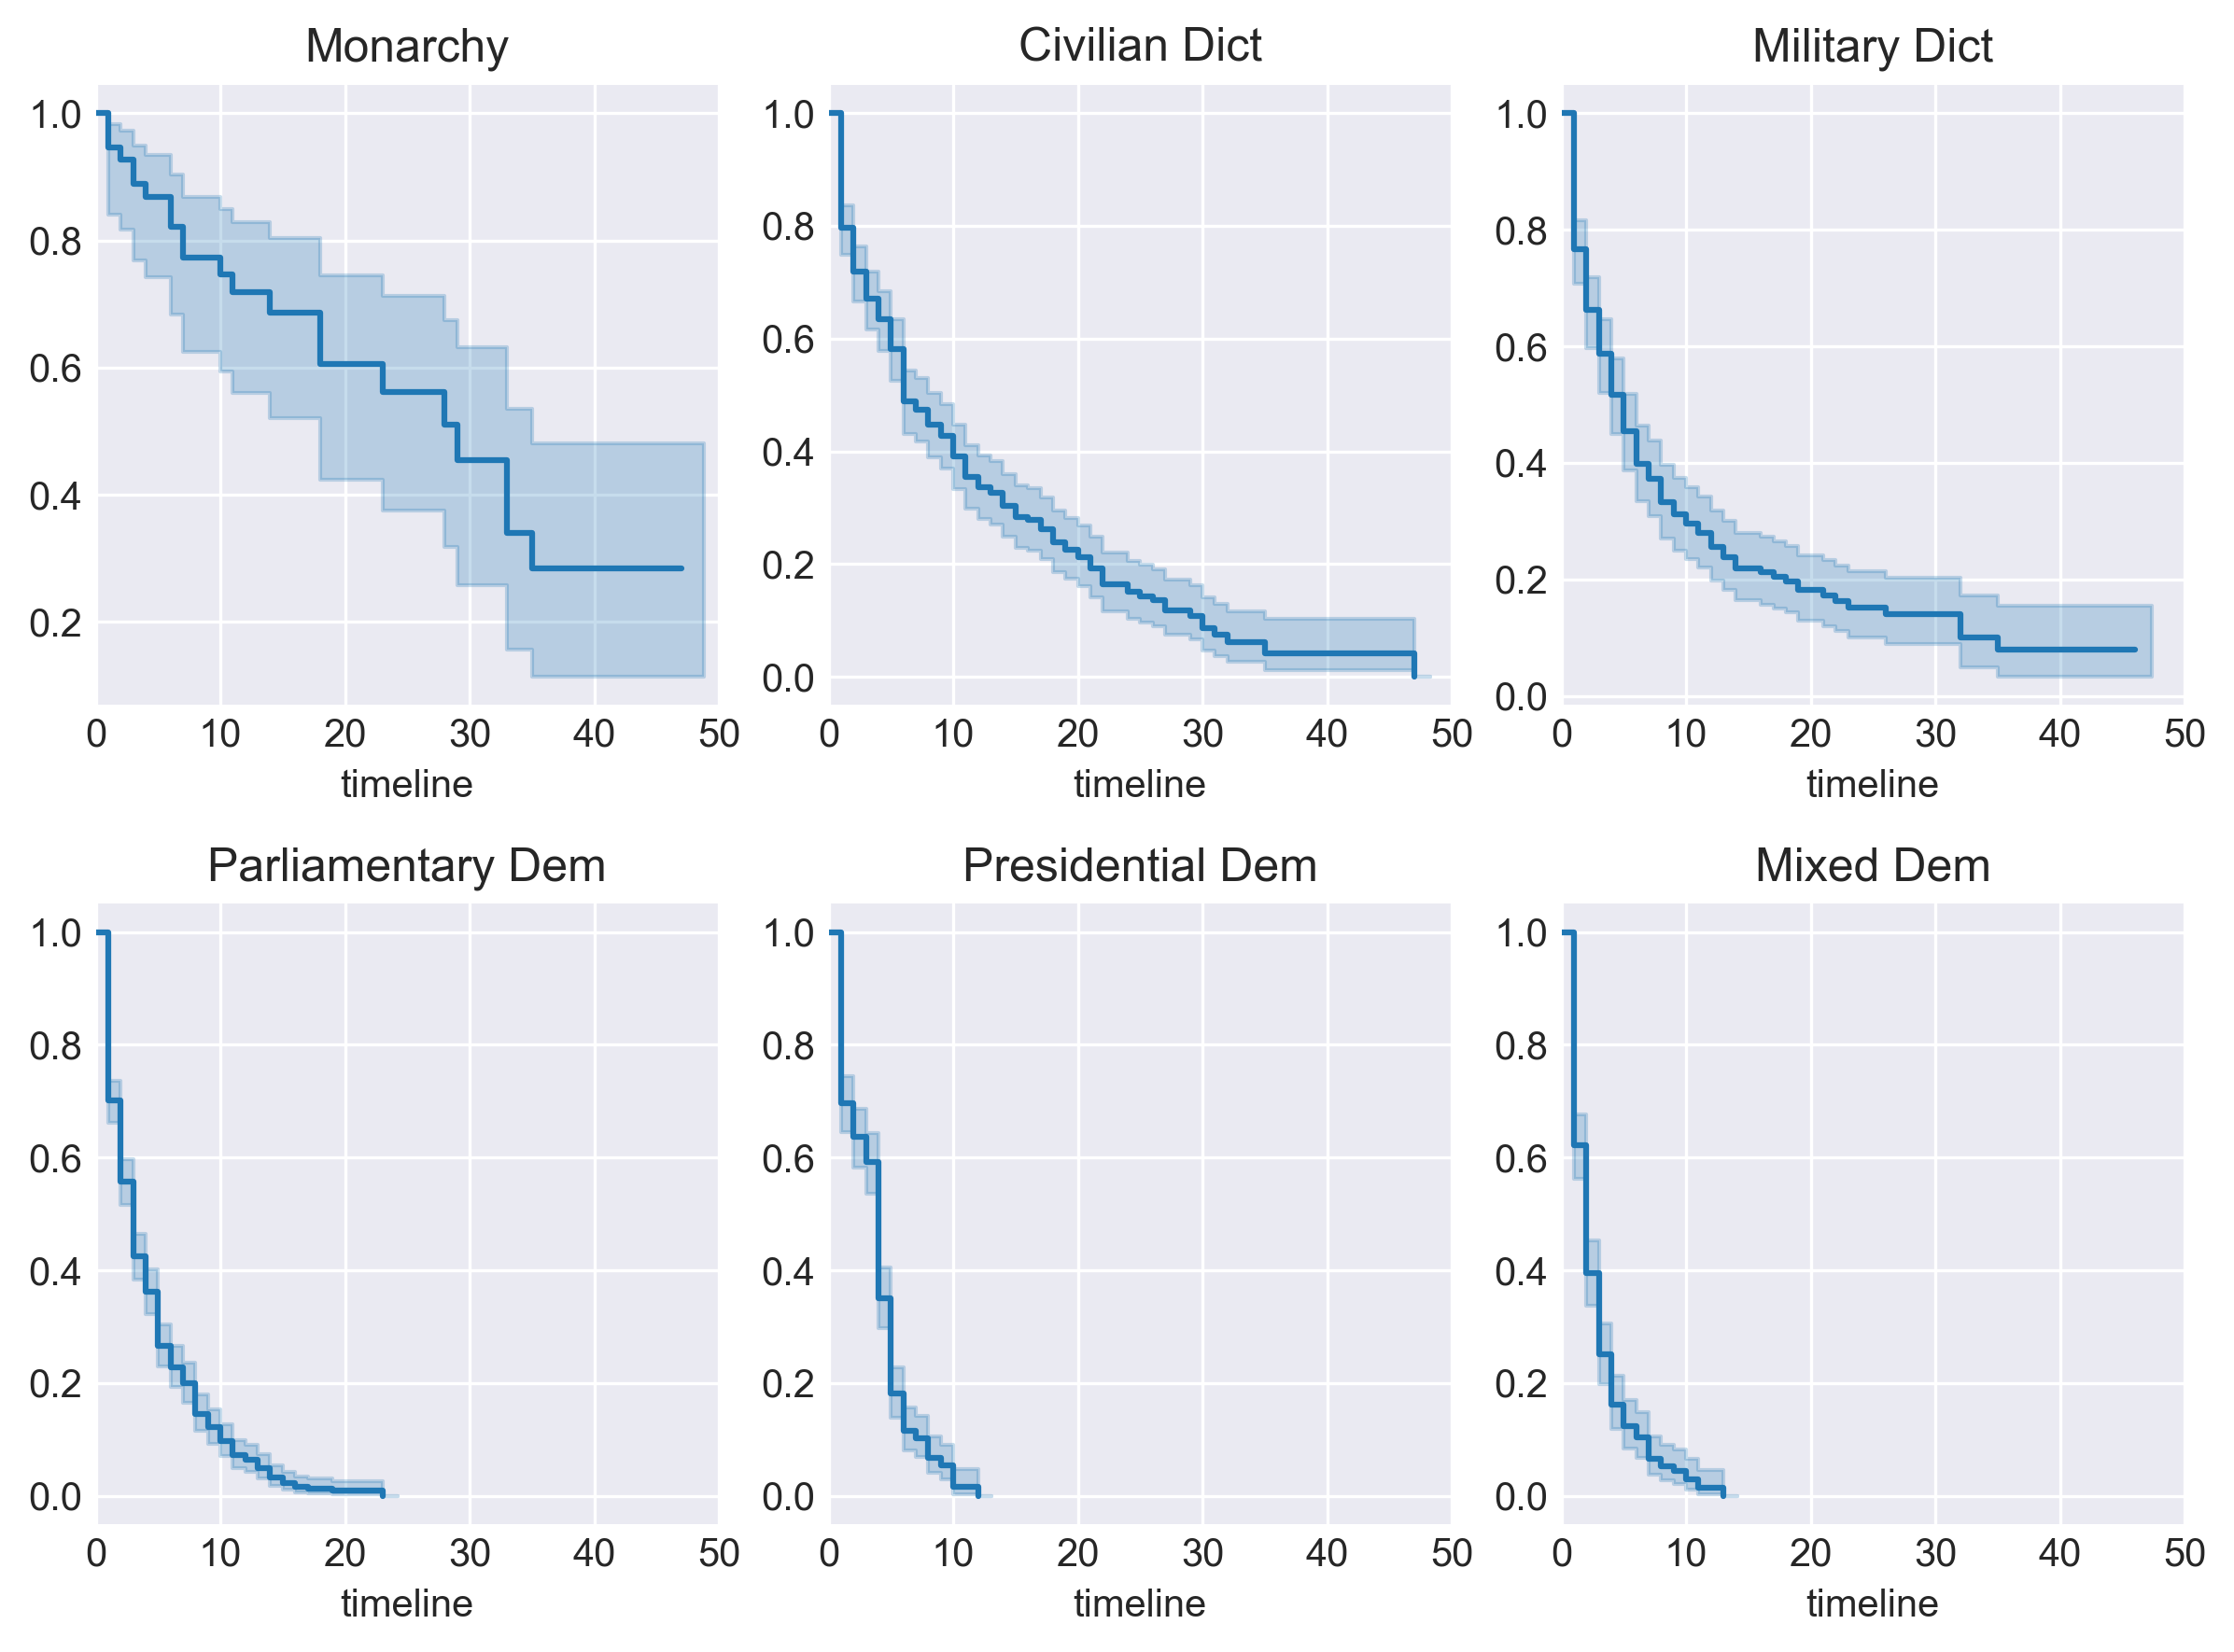

In [39]:
regime_types = data['regime'].unique()
fig, axes = plt.subplots(2, 3, figsize = (8, 6), dpi = 300)
for i, regime_type in enumerate(regime_types):
    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label = regime_type)
    kmf.plot(ax = axes[i//3][i%3], legend = False)
    axes[i//3][i%3].set_title(regime_type)
    axes[i//3][i%3].set_xlim((0, 50))
# axes[0][0].set_ylabel('Frac. in power after $n$ years')
plt.tight_layout()

Utility to help with data formatting

In [40]:
from lifelines.utils import datetimes_to_durations

start_date = ['2013-10-10 0:00:00', '2013-10-09', '2013-10-10']
end_date = ['2013-10-13', '2013-10-10', None]
T, E = datetimes_to_durations(start_date, end_date)#, fill_date='2013-10-15')
print('T (durations): ', T)
print('E (event_observed): ', E)

T (durations):  [3.000e+00 1.000e+00 1.797e+03]
E (event_observed):  [ True  True False]


In [42]:
datetimes_to_durations(start_date, end_date, freq = 'Y')

(array([0., 0., 4.]), array([ True,  True, False]))

## Fitting to a Weibull model

## Cox PH estimator

In [2]:
rossi_dataset = load_rossi()

In [6]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [12]:
rossi_dataset['week'].min()

1

In [13]:
rossi_dataset['week'].max()

52

In [4]:
cph = CoxPHFitter()

In [7]:
cph.fit(rossi_dataset, duration_col='week', event_col='arrest', show_progress=True)

Iteration 1: norm_delta = 0.48337, step_size = 0.95000, ll = -675.38063, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.13160, step_size = 0.95000, ll = -659.79004, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.01712, step_size = 0.95000, ll = -658.76197, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.00103, step_size = 0.95000, ll = -658.74771, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.00005, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.2
Iteration 6: norm_delta = 0.00000, step_size = 0.95000, ll = -658.74766, seconds_since_start = 0.2
Convergence completed after 6 iterations.


<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

In [8]:
cph.print_summary()

n=432, number of events=114

        coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95    
fin  -0.3794     0.6843    0.1914 -1.9826 0.0474     -0.7545     -0.0043   *
age  -0.0574     0.9442    0.0220 -2.6109 0.0090     -0.1006     -0.0143  **
race  0.3139     1.3688    0.3080  1.0192 0.3081     -0.2898      0.9176    
wexp -0.1498     0.8609    0.2122 -0.7058 0.4803     -0.5657      0.2662    
mar  -0.4337     0.6481    0.3819 -1.1357 0.2561     -1.1822      0.3147    
paro -0.0849     0.9186    0.1958 -0.4336 0.6646     -0.4685      0.2988    
prio  0.0915     1.0958    0.0286  3.1938 0.0014      0.0353      0.1476  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640
Likelihood ratio test = 33.266 on 7 df, p=0.00002


In [9]:
cph.hazards_

,fin,age,race,wexp,mar,paro,prio
coef,-0.379422,-0.057438,0.3139,-0.149796,-0.433704,-0.084871,0.091497


In [10]:
cph.baseline_hazard_

,baseline hazard
event_at,
0.0,0.000000
1.0,0.001958
2.0,0.001964
3.0,0.001965
4.0,0.001969
5.0,0.001975
6.0,0.001984
7.0,0.001995
8.0,0.009990


In [14]:
cph.predict_partial_hazard(rossi_dataset.drop(['week', 'arrest'], axis = 1))

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214024
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297945


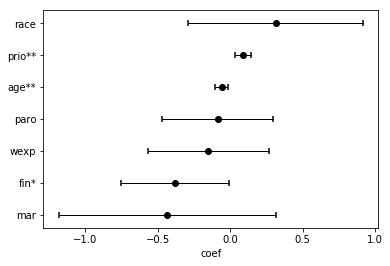

In [16]:
%matplotlib inline
cph.plot()